In [1]:
"""
                        ~ Notable fields/methods ~

sns
 - .scatterplot()
  -- hue
 - .countplot()
  -- hue, order
 - .relplot()  # line or scatter
  -- col, row, col_wrap, col_order, row_order, size, hue, alpha, style, ci, markers, dashes
 - .catplot()  # count, bar, box, point
  -- order, ci, sym, whis, join, estimator, capsize
 - .set_style(), .set_palette(), .set_context()
 - .displot()
  -- fill, kde, rug, bins
 - .regplot(), lmplot()
  -- hue
 - .despine()
  -- left
 - .stripplot()
 - .swarmplot()
 - .boxplot()
 - .violinplot()
 - .boxenplot()
 - .barplot()
 - .pointplot()
 - .countplot()

g = sns.catplot()
 - .fig.suptitle()
  -- y

Multi Plots
 - fig, (ax0,ax1) = plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(7,4))
  -- ax1.set()
   --- xlim, ylim
  -- ax1.axvline()
   --- x, label, linestyle, color


"""
import pandas
import numpy
import scipy
from scipy.stats import iqr, uniform, binom, norm, poisson, expon, t
import matplotlib.pyplot as plt
import seaborn as sns

data_folder = '../../data'
# types: A = super center, B = discount store, C = neighborhood market
df_walmart = pandas.read_csv(f'{data_folder}/walmart_sales_subset.csv', index_col=0)
df_homeless = pandas.read_csv(f'{data_folder}/homeless.csv', index_col=0)
df_amir = pandas.read_csv(f'{data_folder}/amir_deals.csv', index_col=0)
# simplify df_amir to just 100 observations
df_amir = pandas.DataFrame(df_amir[:100])
df_mph = pandas.read_csv(f'{data_folder}/mpg.csv')

In [2]:
display(df_mph.head())
display(df_mph['cylinders'].value_counts().sort_index())
display(df_mph['model_year'].value_counts().sort_index())
display(df_mph['name'].value_counts().sort_index())

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


3      4
4    204
5      3
6     84
8    103
Name: cylinders, dtype: int64

70    29
71    28
72    28
73    40
74    27
75    30
76    34
77    28
78    36
79    29
80    29
81    29
82    31
Name: model_year, dtype: int64

amc ambassador brougham    1
amc ambassador dpl         1
amc ambassador sst         1
amc concord                2
amc concord d/l            1
                          ..
vw dasher (diesel)         1
vw pickup                  1
vw rabbit                  2
vw rabbit c (diesel)       1
vw rabbit custom           1
Name: name, Length: 305, dtype: int64

In [3]:
df_amir.head()

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43
3,Product B,New,Won,5738.09,87
4,Product I,Current,Won,2591.24,83
5,Product E,Current,Won,6622.97,17


In [4]:
display(df_amir['status'].value_counts())
display(df_amir['client'].value_counts())
display(df_amir['product'].value_counts())

Won     67
Lost    33
Name: status, dtype: int64

Current    76
New        24
Name: client, dtype: int64

Product B    41
Product A    12
Product D    10
Product C    10
Product F     9
Product I     7
Product E     4
Product N     3
Product J     2
Product G     2
Name: product, dtype: int64

In [5]:
df_homeless.head()

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570.0,864.0,4887681
1,Pacific,Alaska,1434.0,582.0,735139
2,Mountain,Arizona,7259.0,2606.0,7158024
3,West South Central,Arkansas,2280.0,432.0,3009733
4,Pacific,California,109008.0,20964.0,39461588


In [6]:
df_walmart.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


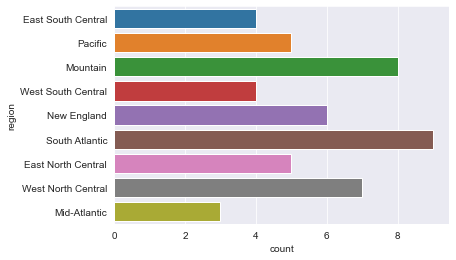

In [7]:
sns.countplot(y='region', data=df_homeless)
plt.show()

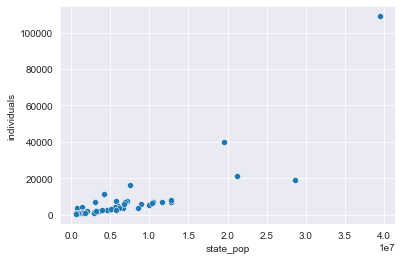

In [8]:
sns.scatterplot(y='individuals', x='state_pop', data=df_homeless)
plt.show()

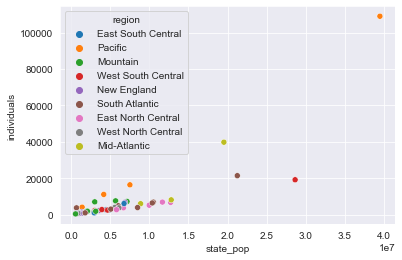

In [9]:
sns.scatterplot(y='individuals', x='state_pop',
                # hue_order=['California','Alaska'],
                # palette={'field_name':'color'}
                hue='region', data=df_homeless)
plt.show()

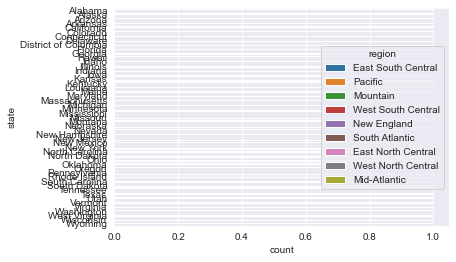

In [10]:
sns.countplot(y='state', data=df_homeless, hue='region')
plt.show()

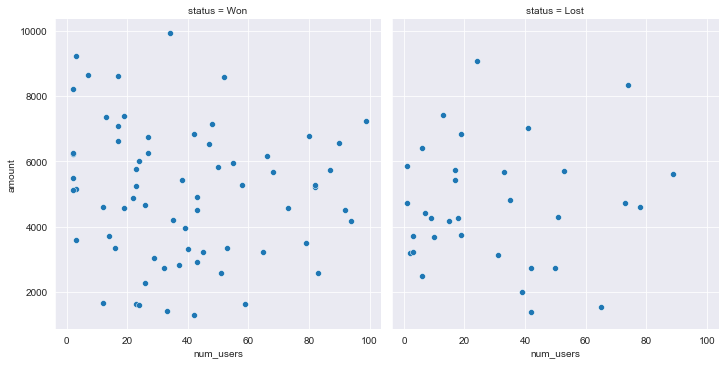

In [11]:
sns.relplot(data=df_amir, y='amount', x='num_users', col='status', kind='scatter')
plt.show()

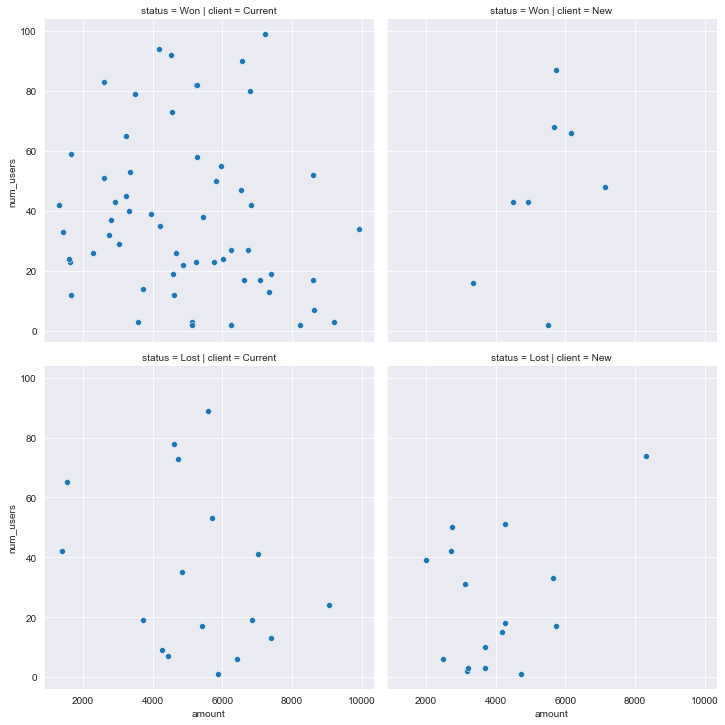

In [12]:
sns.relplot(
    kind='scatter', data=df_amir, x='amount', y='num_users', col='client', row='status',
    row_order=['Won', 'Lost'], col_order=['Current', 'New'])
plt.show()

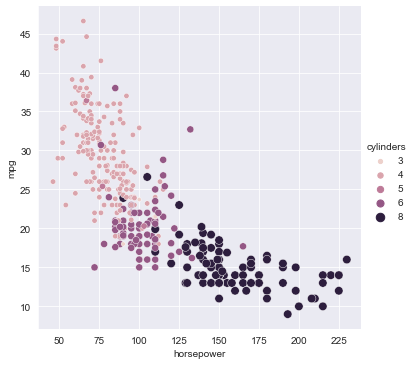

In [13]:
sns.relplot(
    kind='scatter', data=df_mph, x='horsepower', y='mpg', size='cylinders', hue='cylinders')
plt.show()

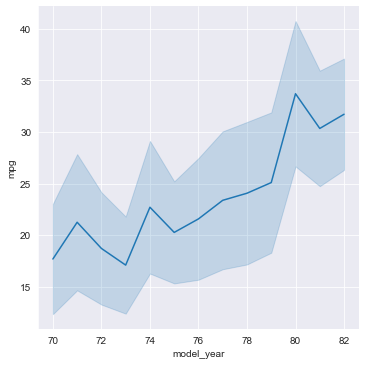

In [14]:
sns.relplot(kind='line', data=df_mph, x='model_year', y='mpg', ci='sd')
plt.show()

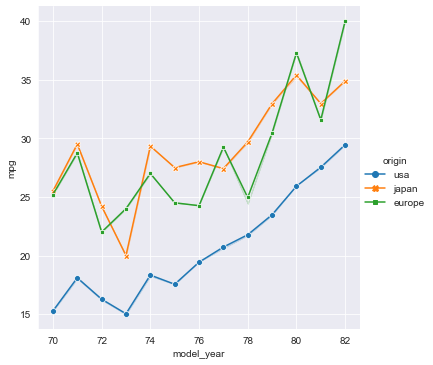

In [15]:
sns.relplot(kind='line', data=df_mph, x='model_year', y='mpg',
            style='origin', hue='origin', ci=False, dashes=False, markers=True)
plt.show()

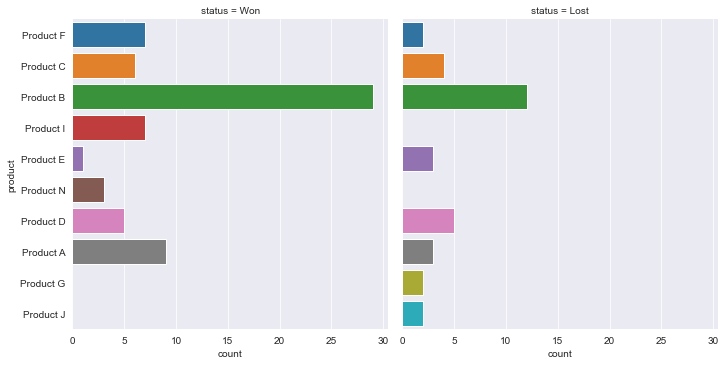

In [18]:
sns.catplot(kind='count', data=df_amir, y='product', col='status')
plt.show()

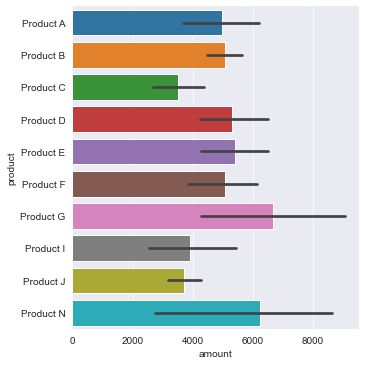

In [31]:
order = list(sorted(df_amir['product'].unique(), reverse=False))
sns.catplot(kind='bar', data=df_amir, x='amount', y='product', order=order)
plt.show()

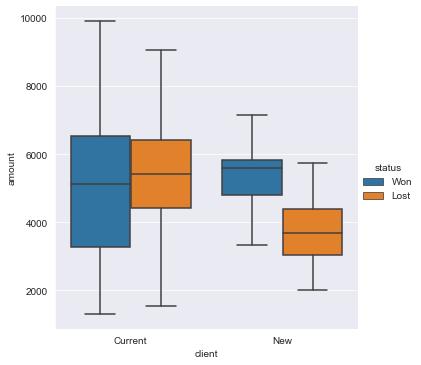

In [33]:
sns.catplot(kind='box', data=df_amir, x='client', y='amount', sym='', hue='status')
plt.show()

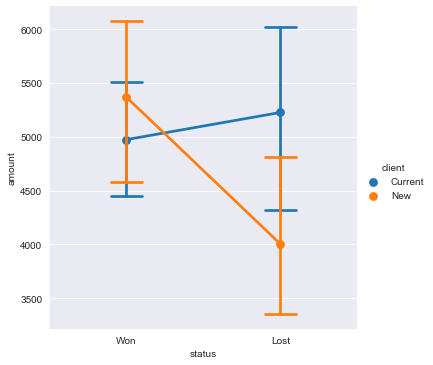

In [38]:
sns.catplot(
    kind='point', data=df_amir, x='status', y='amount', hue='client', join=True, capsize=0.2, alpha=0.2)
plt.show()

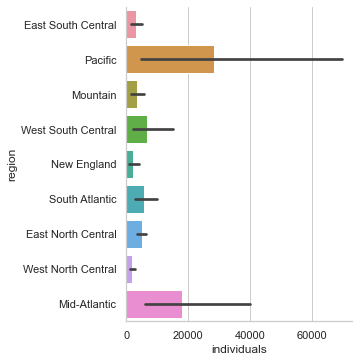

In [42]:
sns.set_style('whitegrid')
sns.set_palette('RdBu')
sns.set_context('notebook')
sns.catplot(kind='bar', data=df_homeless, y='region', x='individuals')
plt.show()

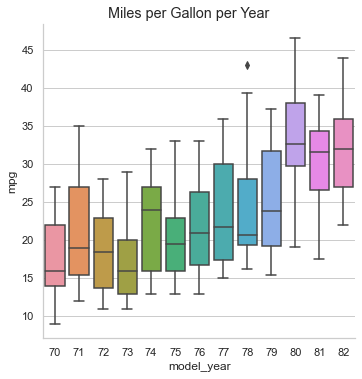

In [48]:
# FacetGrid
g = sns.catplot(kind='box', data=df_mph, x='model_year', y='mpg')
g.fig.suptitle('Miles per Gallon per Year', y=1.01)
plt.show()

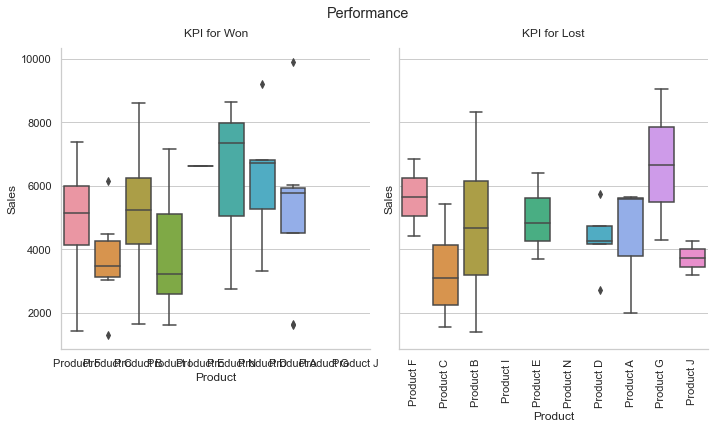

In [58]:
# AxesSubplot
g = sns.catplot(kind='box', data=df_amir, x='product', y='amount', col='status')
plt.xticks(rotation=90)
g.fig.suptitle('Performance', y=1.04)
g.set_titles('KPI for {col_name}', y=1.02)
g.set(xlabel='Product', ylabel='Sales')

plt.show()

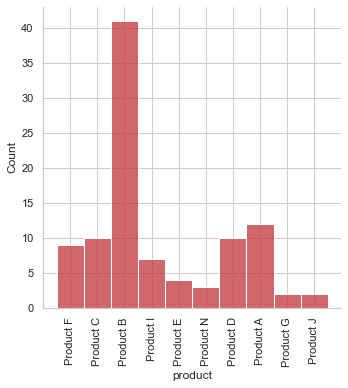

None

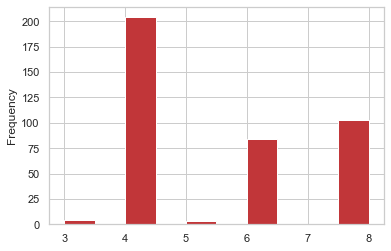

None

In [70]:
sns.displot(kind='hist', data=df_amir, x='product')
plt.xticks(rotation=90)
display(plt.show())
df_mph['cylinders'].plot.hist()
display(plt.show())

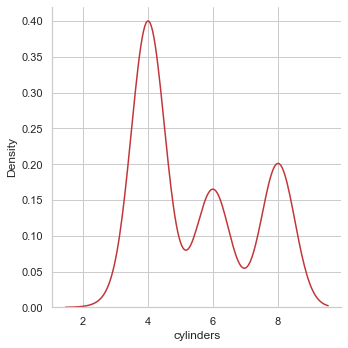

In [64]:
sns.displot(kind='kde', data=df_mph, x='cylinders')
plt.show()

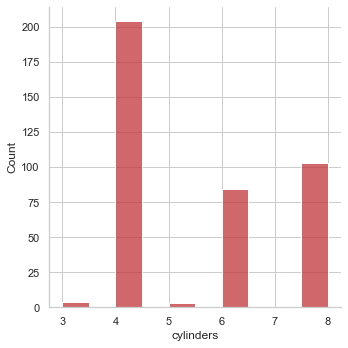

In [65]:
sns.displot(kind='hist', data=df_mph, x='cylinders')
plt.show()

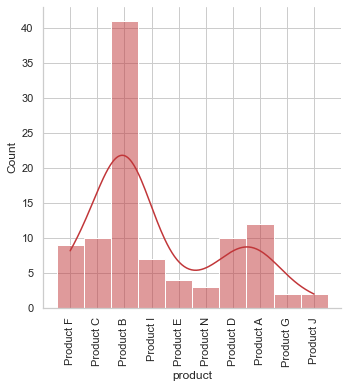

In [71]:
sns.displot(kind='hist', data=df_amir, kde=True, x='product')
plt.xticks(rotation=90)
plt.show()

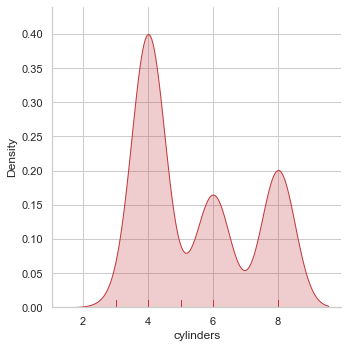

In [76]:
sns.displot(kind='kde', data=df_mph, rug=True, x='cylinders', fill=True)
# plt.xticks(rotation=90)
plt.show()

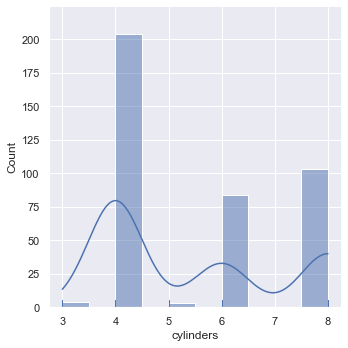

In [80]:
# sns.set()
sns.set_style('darkgrid')
sns.displot(df_mph['cylinders'], kde=True, rug=True)
plt.show()

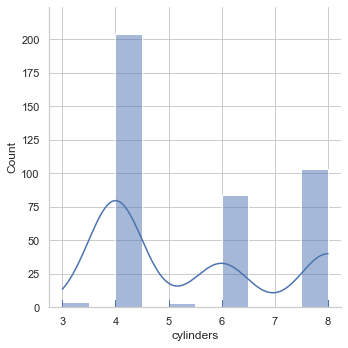

In [82]:
sns.set_style('whitegrid')
sns.displot(df_mph['cylinders'], kde=True, rug=True)
plt.show()

None

None

None

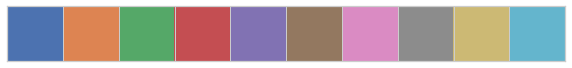

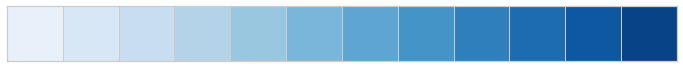

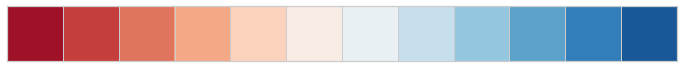

In [87]:
palettes = ['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']
display(sns.palplot(sns.color_palette()))
display(sns.palplot(sns.color_palette('Blues', 12)))
display(sns.palplot(sns.color_palette('RdBu', 12)))

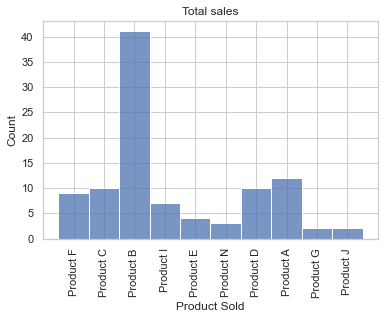

In [91]:
fig, ax = plt.subplots()
sns.histplot(df_amir['product'], ax=ax)
ax.set(
    xlabel='Product Sold',
    ylabel='Count',
    title='Total sales')
plt.xticks(rotation=90)
plt.show()

# Multi-plots w/plt+sns

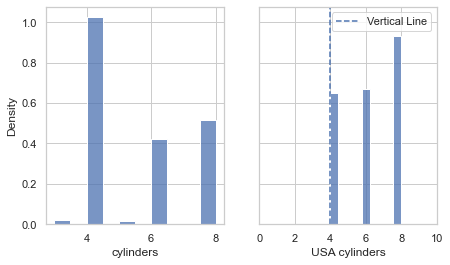

In [93]:
fig, (ax0,ax1) = plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(7,4))
sns.histplot(df_mph['cylinders'],stat='density',ax=ax0)
sns.histplot(df_mph.query('origin=="usa"')['cylinders'],stat='density',ax=ax1)
ax1.set(xlabel='USA cylinders',xlim=(0,10))
ax1.axvline(x=4,label='Vertical Line',linestyle='--')
ax1.legend()
plt.show()

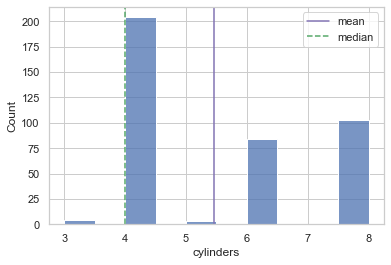

In [97]:
fig, ax = plt.subplots()
sns.histplot(df_mph['cylinders'],ax=ax)
ax.axvline(x=df_mph['cylinders'].mean(),linestyle='-',label='mean',color='m')
ax.axvline(x=df_mph['cylinders'].median(),linestyle='--',label='median',color='g')
ax.legend()
plt.show()